# Predict Salary

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r'C:\Users\hp\Desktop\Projects\Data-Projects\Salary_dataset.csv')

In [5]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [7]:
data.shape

(30, 3)

In [9]:
data.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [13]:
data.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [15]:
data.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

<Axes: >

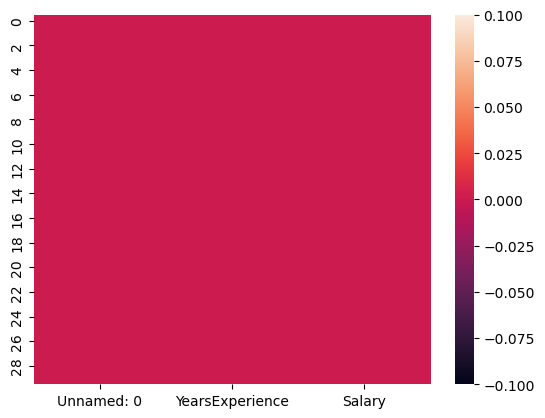

In [17]:
sns.heatmap(data.isnull())

In [19]:
data.duplicated().sum()

0

In [21]:
data.corr()

,Unnamed: 0,YearsExperience,Salary
Unnamed: 0,1.000000,0.986460,0.960826
YearsExperience,0.986460,1.000000,0.978242
Salary,0.960826,0.978242,1.000000


# Create Model

In [23]:
x=data.drop('Salary',axis=1)
y=data['Salary']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [27]:
model1=LogisticRegression()
model2=RandomForestClassifier()
model3=GaussianNB()
model4=SVC()
model5=DecisionTreeClassifier()
model6=GradientBoostingClassifier()

In [29]:
Algorithm=['LogisticRegression','RandomForestClassifier','GaussianNB','SVC','DecisionTreeClassifier','GradientBoostingClassifier']
R2=[]
RMSE=[]

In [31]:
def models(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    rmse=np.sqrt(mean_squared_error(y_test,pre))
    R2.append(r2)
    RMSE.append(rmse)
    score=model.score(x_test,y_test)
    print(f"the score of model is :{score}")

In [37]:
models(model1)
models(model2)  
models(model3)
models(model4)  
models(model5)
models(model6)

the score of model is :0.0
the score of model is :0.0
the score of model is :0.0
the score of model is :0.0
the score of model is :0.0
the score of model is :0.0


In [39]:
df=pd.DataFrame({'Algorithm':Algorithm,'R2_score':R2,'Rmse':RMSE})
df

,Algorithm,R2_score,Rmse
0,LogisticRegression,0.928106,7617.628885
1,RandomForestClassifier,0.961253,5592.293745
2,GaussianNB,0.961253,5592.293745
3,SVC,0.961253,5592.293745
4,DecisionTreeClassifier,0.881013,9799.932508
5,GradientBoostingClassifier,0.905854,8717.151991


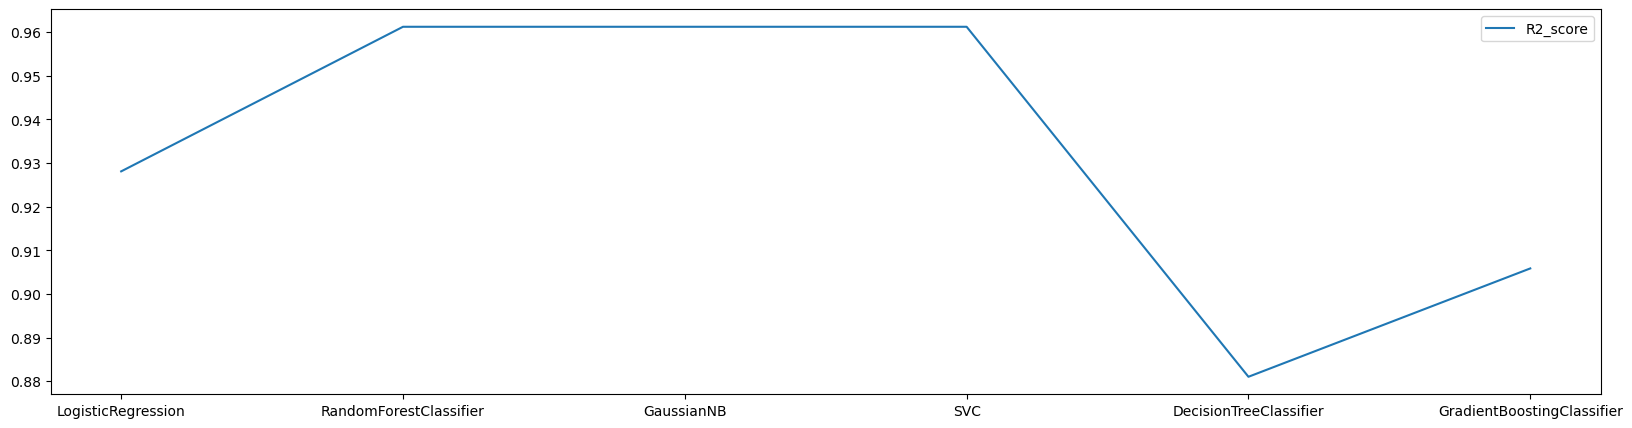

In [41]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(df.Algorithm,df.R2_score,label='R2_score')
plt.legend()
plt.show()

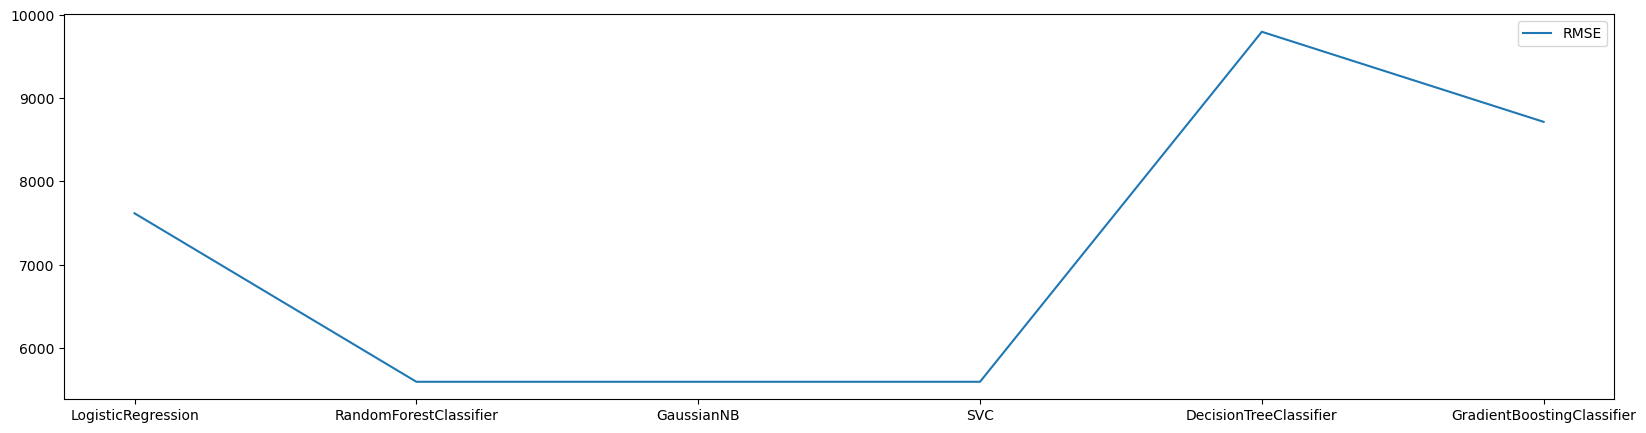

In [43]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(df.Algorithm,df.Rmse,label='RMSE')
plt.legend()
plt.show()

In [47]:
def pred(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    print(classification_report(pre,y_test))

In [49]:
pred(model1)

              precision    recall  f1-score   support

     39344.0       0.00      0.00      0.00       1.0
     43526.0       0.00      0.00      0.00       1.0
     46206.0       0.00      0.00      0.00       0.0
     56643.0       0.00      0.00      0.00       0.0
     91739.0       0.00      0.00      0.00       1.0
     98274.0       0.00      0.00      0.00       0.0
    101303.0       0.00      0.00      0.00       0.0
    105583.0       0.00      0.00      0.00       2.0
    113813.0       0.00      0.00      0.00       0.0
    121873.0       0.00      0.00      0.00       1.0
    122392.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



In [51]:
pred(model2)

              precision    recall  f1-score   support

     39344.0       0.00      0.00      0.00       1.0
     46206.0       0.00      0.00      0.00       0.0
     56643.0       0.00      0.00      0.00       0.0
     60151.0       0.00      0.00      0.00       1.0
     91739.0       0.00      0.00      0.00       2.0
     98274.0       0.00      0.00      0.00       0.0
    101303.0       0.00      0.00      0.00       0.0
    109432.0       0.00      0.00      0.00       1.0
    112636.0       0.00      0.00      0.00       1.0
    113813.0       0.00      0.00      0.00       0.0
    122392.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



In [53]:
pred(model3)

              precision    recall  f1-score   support

     39344.0       0.00      0.00      0.00       1.0
     46206.0       0.00      0.00      0.00       0.0
     56643.0       0.00      0.00      0.00       0.0
     60151.0       0.00      0.00      0.00       1.0
     91739.0       0.00      0.00      0.00       1.0
     98274.0       0.00      0.00      0.00       0.0
    101303.0       0.00      0.00      0.00       0.0
    109432.0       0.00      0.00      0.00       2.0
    113813.0       0.00      0.00      0.00       0.0
    121873.0       0.00      0.00      0.00       1.0
    122392.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0

